In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/Users/joshndirangu/Documents/titanic-eda/data/engineered_titanic.csv')

In [6]:
df.sample(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,AgeGroup,FareBand
294,295,0,3,1,24.0,0,0,7.8958,2,1,1,2,4,1
585,586,1,1,0,18.0,0,2,79.6500,2,3,0,1,3,3
796,797,1,1,0,49.0,0,0,25.9292,2,1,1,4,0,0
86,87,0,3,1,16.0,1,3,34.3750,2,5,0,2,3,3
747,748,1,2,0,30.0,0,0,13.0000,2,1,1,1,4,2
100,101,0,3,0,28.0,0,0,7.8958,2,1,1,1,4,1
505,506,0,1,1,18.0,1,0,108.9000,0,2,0,2,3,3
207,208,1,3,1,26.0,0,0,18.7875,0,1,1,2,4,0
573,574,1,3,0,28.0,0,0,7.7500,1,1,1,1,4,1
728,729,0,2,1,25.0,1,0,26.0000,2,2,0,2,4,0


In [7]:
df.isnull().sum()
#df.columns.tolist()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
FamilySize     0
IsAlone        0
Title          0
AgeGroup       0
FareBand       0
dtype: int64

In [8]:
y = df['Survived']  # getting the target FIRST
X = df.drop(['PassengerId','Survived', 'SibSp', 'Parch', 'Fare', 'Age'], axis=1)  # create X separately, these are the features

# Only retaining the values the hold a predictive vaue in the features 

# Confirming the shape
print(X.shape)
print(y.shape)

(891, 8)
(891,)


## SPLITTING THE DATA INTO TRAINING AND TEST SETS
 # Purpose   
1. Train Set -Used to train the model — this is what the model "learns" from      
2. Test Set - Used to evaluate how well the model generalizes to new, unseen data


In [9]:
from sklearn.model_selection import train_test_split

# Perform the split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,           # 20% for testing, 80 FOR TRAINING
    random_state=42,         # same split whenever you run
    stratify=y               # maintains the class distribution in both sets
)

# Confirm shapes
print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape :", y_test.shape)

# Check target distribution in both sets
print("Training set class balance:\n", y_train.value_counts(normalize=True))
print("Test set class balance:\n", y_test.value_counts(normalize=True))

X_train shape: (712, 8)
X_test shape : (179, 8)
y_train shape: (712,)
y_test shape : (179,)
Training set class balance:
 Survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64
Test set class balance:
 Survived
0    0.614525
1    0.385475
Name: proportion, dtype: float64


## MODEL TRAINING WITH LOGISTIC REGRESSION


In [12]:
# Importing and initializing the model 

from sklearn.linear_model import LogisticRegression

# Create the model
log_reg = LogisticRegression(max_iter=1000, random_state=42)


In [13]:
# Training the models on the training sets

log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [14]:
# Making predictions of the test set

y_pred = log_reg.predict(X_test)

In [15]:
# Evaluating the logistic regression model perfmance

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Detailed Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8100558659217877

Confusion Matrix:
 [[97 13]
 [21 48]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.79      0.70      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179



### INTERPRETATION OF THIS MODEL
1. Precision: How many predicted survivors were actually correct, USEFUL IN PREDICTABILITY

2. Recall: How many actual survivors correctly found, USEFUL IN KNOWING HOW ACCURATE THE MODEL DATA IS

3. F1-score: Balance between precision & recall

### CONFUSION MATRIX EXPLAINED
[ [TN   FP]
[FN   TP] ]

True Positive (TP) -	Model predicted survived (1) and was correct
True Negative (TN) -	Model predicted died (0) and was correct
False Positive (FP) -	Model predicted survived, but person died
False Negative (FN) -	Model predicted died, but person survived

Precision = TP / (TP + FP)
Recall = TP / (TP + FN)

F1 SCORE
F1 = 2 * (Precision * Recall) / (Precision + Recall)
Useful when you want a balanced score that considers both errors.

In [16]:
# Saving the current Regression Model

import joblib

# Save logistic regression model
joblib.dump(log_reg, '/Users/joshndirangu/Documents/titanic-eda/models/logistic_model.pkl')


['/Users/joshndirangu/Documents/titanic-eda/models/logistic_model.pkl']

# MODEL 2: RANDOM FOREST CLASSIFIER
collection of decision trees working together (an ensemble). Each tree gives a prediction, and the forest takes a vote. Leads to: Better accuracy, Less overfitting, Robustness to noise

In [23]:
# Importing and creating the modelfrom sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,    # Number of trees in the forest
    max_depth=None,      # Let trees grow fully unless overfitting
    random_state=42      # For reproducibility
)


In [24]:
# Training the model

rf_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [19]:
# Testing the model
print("Training Accuracy:", rf_model.score(X_train, y_train))


Training Accuracy: 0.8946629213483146


In [21]:
# Making predictions of the test set

y_pred_rf = rf_model.predict(X_test)


In [26]:
# Evaluating the model's  performance gives

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Full Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Accuracy: 0.776536312849162

Confusion Matrix:
 [[93 17]
 [23 46]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.82       110
           1       0.73      0.67      0.70        69

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.77      0.78      0.77       179



## Random Forest Feature Importance

Analysing which features the Random Forest model relied on most to make its predictions.


In [28]:
# Getting feature importances from the trained model

importances = rf_model.feature_importances_
features = X_train.columns


In [30]:
# Combine features and their importances 

feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Show top 10 features
print(feature_importance_df.head(10))


      Feature  Importance
1         Sex    0.278493
5       Title    0.167674
0      Pclass    0.142950
3  FamilySize    0.122939
7    FareBand    0.119076
6    AgeGroup    0.089006
2    Embarked    0.056891
4     IsAlone    0.022971


/var/folders/xz/w2xjxjwd0n9bhv2r41r2rs4c0000gn/T/ipykernel_6553/1547324921.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')


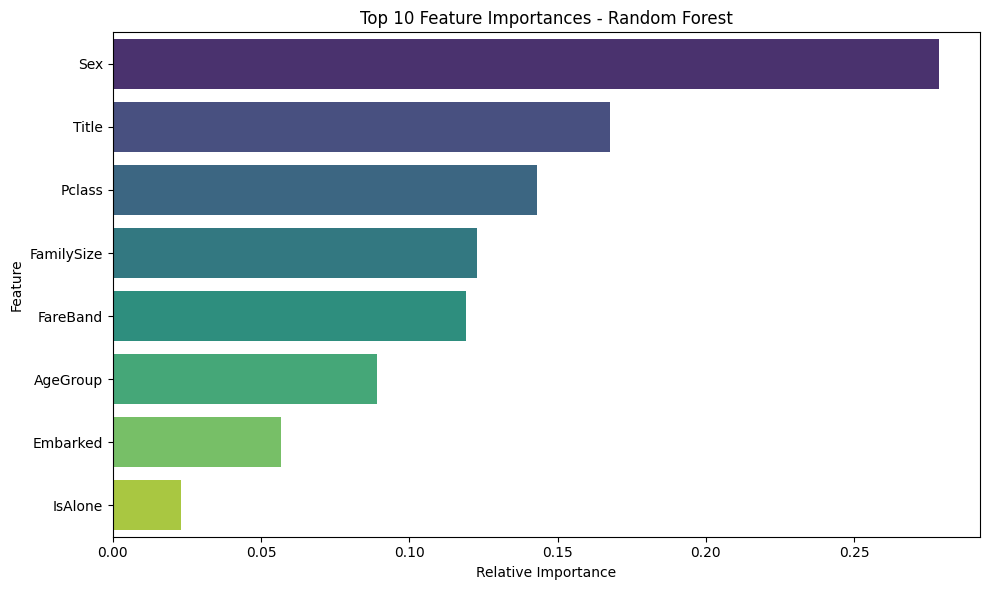

In [32]:
# Visualizing the features

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Feature Importances - Random Forest')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## What Does This Mean?

Feature engineering was effective: the model is relying on logical, interpretable features.

Random Forest is focusing on relevant variables, not noise.

So this performance is not due to bad features — it’s more likely due to model capacity or default parameters.

Thus we can carry out hyperparameter tuning, to help us make the model a bit more effective

### Hyperparameter Tuning

In [33]:
# Using GridSearchCV to test combinations of Random Forest parameters and find the one that gives the best performance

from sklearn.model_selection import GridSearchCV

# Defining the parameter grid
param_grid = {
    'n_estimators': [100, 200],            # number of trees
    'max_depth': [None, 5, 10],            # how deep each tree can go
    'min_samples_split': [2, 5],           # minimum samples required to split an internal node
    'min_samples_leaf': [1, 2]             # minimum samples required to be at a leaf node
}


In [34]:
# Setting up the grid search

# Create base model
rf = RandomForestClassifier(random_state=42)

# Create grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,   # Use all available cores
                           verbose=1)


In [35]:
# Fitting the grid search model
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [None, 5, ...], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5], 'n_estimators': [100, 200]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [36]:
# Checking the best parameters and accuracy

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Score:", grid_search.best_score_)


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validated Score: 0.8216586230670739


In [37]:
# Using the best model on the test set

# Predict using the best estimator

best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate it
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Test Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best_rf))


Test Accuracy: 0.8324022346368715

Confusion Matrix:
 [[99 11]
 [19 50]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87       110
           1       0.82      0.72      0.77        69

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



# Model Comparison and Conclusion

- After tuning, the Random Forest model with `max_depth=5` and `min_samples_leaf=2` achieved:
  - Test Accuracy: **83.2%**
  - Best Cross-Validated Score: **82.2%**
- This outperformed both Logistic Regression and the default Random Forest.
- We therefore chose this model as the final one and saved it as a `.pkl` file for deployment or reuse.

/var/folders/xz/w2xjxjwd0n9bhv2r41r2rs4c0000gn/T/ipykernel_6553/1093165822.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, y='Feature', x='Importance', palette='crest')


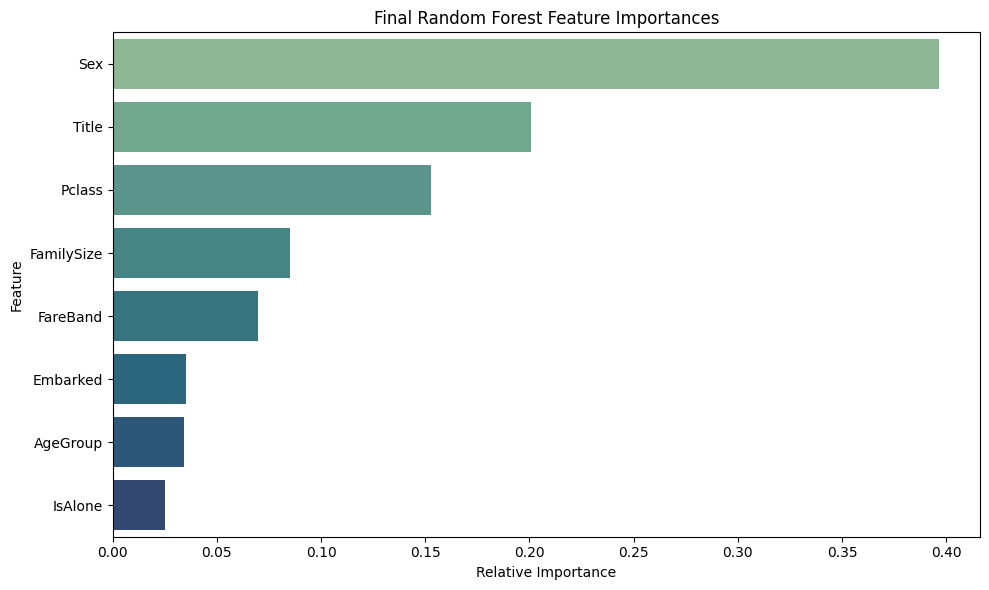

In [41]:
# Getting feature importances from the best estimator
 
importances = best_rf.feature_importances_
features = X_train.columns

# Create DataFrame
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, y='Feature', x='Importance', palette='crest')
plt.title('Final Random Forest Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.tight_layout()

# Saving the plot in the images folder /Users/joshndirangu/Documents/titanic-eda/images
plt.savefig("/Users/joshndirangu/Documents/titanic-eda/images/final_feature_importance.png")

plt.show()


In [44]:
# Saving the new random forest classifier model

import pickle
import os

# Ensure the directory exists
os.makedirs("models", exist_ok=True)

# Save the final tuned model
with open("/Users/joshndirangu/Documents/titanic-eda/models/final_random_forest_model.pkl", "wb") as file:
    pickle.dump(best_rf, file)


In [46]:
# To test whethere the model loads correctly

with open("models/final_random_forest_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

print("Model loaded successfully:", type(loaded_model))


Model loaded successfully: <class 'sklearn.ensemble._forest.RandomForestClassifier'>


##  Final Model Summary

###  Objective
To build a predictive model using the Titanic dataset to determine whether a passenger survived based on features like class, gender, age, family size, and more.

---

###  Steps Followed

1. **Data Cleaning**:
   - Handled missing values in `Age`, `Embarked`, and `Fare`
   - Dropped redundant columns (e.g., Name, Ticket, Cabin)

2. **Data Visualization**:
   - Explored relationships between survival and features like `Sex`, `Pclass`, and `Fare`
   - Identified strong predictors like `Sex`, `Title`, and `FareBand`

3. **Feature Engineering**:
   - Created new variables: `FamilySize`, `IsAlone`, `Title`, `AgeGroup`, `FareBand`
   - Label encoded categorical features for modeling

4. **Modeling**:
   - Trained and evaluated:
     - Logistic Regression
     - Random Forest (default)
     - Tuned Random Forest with `GridSearchCV`

---

###  Final Model

- **Algorithm**: Tuned Random Forest Classifier
- **Best Parameters**:  
  `max_depth=5`, `min_samples_leaf=2`, `min_samples_split=2`, `n_estimators=100`
- **Test Accuracy**: `83.2%`
- **Cross-Validated Train Score**: `82.2%`
- **Saved to**: `models/final_random_forest_model.pkl`

---

###  Feature Importance (Top Predictors)

- `Sex`  
- `Title`  
- `Pclass`  
- `FamilySize`  
- `FareBand`

---

###  Prediction Script

A `predict.py` script was added to:
- Load the model
- Accept sample data
- Predict survival outcome

---

###  Next Steps / Improvements

- Add more advanced models like XGBoost or Gradient Boosting
- Turn into a web app (e.g., Flask or Streamlit)
- Automate pipeline with `scikit-learn` pipelines

---